# 6장 결정트리
## EPOCH 3기 한우림

- 결정 트리(dicision tree): 분류, 회귀, 다중출력 작업, 매우 복잡한 데이터셋 학습까지 가능한 강력한 머신러닝 알고리즘
- 랜덤 포레스트의 기본 구성 요소


In [16]:
# import library

import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz

### 6.1 결정 트리 학습과 시각화

In [22]:
iris = load_iris()
X_iris = iris.data[:, 2:] # 꽃잎 길이와 너비
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

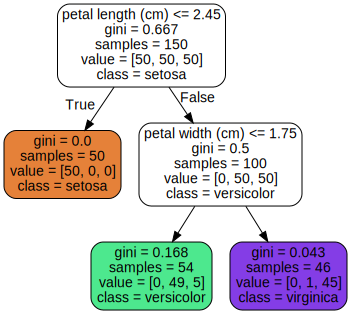

In [27]:
# export_graphviz : 결정트리 시각화
export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("iris_tree.dot")

- 그림 6-1 붓꽃 결정 트리

In [15]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### 6.2 예측하기
- 새로 발견한 붓꽃의 품종을 분류하려 한다고 가정
- 루트 노드(맨 꼭대기 노드, 깊이 0)에서 꽃잎의 길이가 2.45보다 짧은지 검사
  - True일 경우, leaf node이므로 추가 검사 X, Iris-Setosa 로 예측
  - False일 경우, 꽃잎의 너비가 1.75보다 작은지 검사 -> Iris-Virginica
- 노드
  - sample: 얼마나 많은 훈련 샘플이 적용되었는지
  - value: 노드에서 각 크래스에 얼마나 많은 훈련 샘플이 있는지
  - **gini 불순도 측정**
    - gini=0: 노드가 순수하다, 한 노드의 모든 샘플에 같은 클래스에 속함
    - 지니 불순도
$G_i=1-\sum {p_{i,k}}^2$

### 6.3 클래스 확률 추정
- 한 샘플이 특정 클래스 k에 속할 확률 추정 가능
- 이 샘플에 대해 리프 노드를 찾기 위해 트리 탐색 -> 그 노드에 있는 클래스 k의 훈련 샘플의 비율 반환
- e.g., 길이 5cm, 너비 1.5cm 인 꽃잎
  - 리프 노드: 깊이 2에서 왼쪽 노드
  - 결정 트리: 그에 대한 확률 출력

In [28]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

- Setosa: 0%
- Versicolor: 90.7%
- Virginica: 9.3%
- 클래스를 하나 예측한다면 가장 높은 확률을 가진 versicolor(클래스 1)를 출력할 것

In [17]:
tree_clf.predict([[5, 1.5]])

array([1])

### 6.4 CART 훈련 알고리즘
- 사이킷런에서 결정 트리를 훈련시키기 위해 사용하는 알고리즘
- 훈련 세트를 하나의 특성 $k$의 임곗값 $t_k$ 를 사용하여 두 개의 서브셋으로 나눔
- $k$, $t_k$ 선택 방법: (크기에 따른 가중치가 적용된) 가장 순수한 서브셋으로 나눌 수 있는 짝 ($k$, $t_k$) 찾기
$$J(k, t_{k})=\frac{m_{left}}{m} G_{left}+\frac{m_{right}}{m}G_{right}$$
  - $G_{left/right}$: 왼쪽/오른쪽 서브셋의 불순도
  - $m_{left/right}$: 왼쪽/오른쪽 서브셋의 샘플 수

- 훈련 세트를 성공적으로 둘로 나누었다면 같은 방식을 반복
- max_depth 최대 깊이가 되거나 불순도를 줄이는 분할을 찾을 수 없을 때 중지

### 6.5 계산 복잡도
- 결정 트리는 거의 균형을 이루고 있으므로 탐색하기 위해서는 약 $O(log_{2}(m))$ 개의 노드를 거쳐야 함
- 각 노드는 하나의 특성값만 확인 -> 예측에 필요한 전체 복잡도는 특성 수와 무관하게 $O(log_{2}(m))$ => 큰 훈련 세트를 다룰 때도 예측 속도가 매우 빠름
- 훈련 알고리즘: 각 노드에서 모든 훈련 샘플의 모든 특성을 비교
- 각 노드에서 모든 샘플의 모든 특성 비교시 $O(n*mlog_{2}(m))$

### 6.6 지니 불순도 또는 엔트로피?
- 지니 불순도 default, criterion="entropy" 지정시 엔트로피 불순도 사용 가능
- **엔트로피**: 열역학의 개념, 모든 메시지가 동일할 때 값이 0
  - 어떤 세트가 한 클래스의 샘플만 담고 있다면 엔트로피가 0
$$H_{i}=-∑p_{i,k}log_{2}(p_{i,k})$$
- 둘 중 어느 것을 사용?
  - 실제로는 큰 차이 X
  - 지니 불순도: 계산이 조금 더 빠르므로 기본값으로 좋음
  - 다른 트리가 만들어지는 경우, 엔트로피가 더 균형 잡힌 트리 생성

### 6.7 규제 매개변수
- 결정 트리는 훈련 데이터에 대한 제약 사항 x
  - 훈련 전 파라미터 수가 결정되지 않음 -> **비파라미터 모델**
  - 모델 구조가 데이터에 맞춰져서 고정되지 않고 자유로움
- 파라미터 모델: 미리 정의된 모델 파라미터 수를 가지므로 자유도 제한, 과대적합될 위험 줄어듦
- 규제: 결정 트리의 자유도 제한 (훈련 데이터에 대한 과대적합을 피하기 위해)
- 사이킷런
  - max_depth: 결정 트리의 최대 깊이 제어 -> 모델을 규제하여 과대적합 위험 감소
- DecisionTreeClassifier의 하이퍼파라미터
  - min_samples_split: 분할 전 노드가 가져야 하는 최소 샘플 수
  - min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
  - min_weight_fraction_leaf: min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율
  - max_leaf_nodes: 리프 노드의 최대 수
  - max_features: 각 노드에서 분할에 사용할 특성의 최대 수
- min_ 매개변수 증가 또는 max_ 매개변수 감소 -> 모델 규제 증가

### 6.8 회귀
- 사이킷런 - DecisionTreeRegressor
  - 잡음이 섞인 2차 함수 형태의 데이터셋 활용
  - max_depth = 2


In [30]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # 랜덤한 하나의 입력 특성
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

**회귀를 위한 CART 비용 함수**
$$J(k,t_{k})=\frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m} MSE_{right}$$
$$MSE_{node}=\frac {1}{m_{node}}\sum(\hat{y}_{node}-y^{(i)})^{2}$$
$$\hat{y}_{node} =\frac {1}{m_{node}}\sum y^{(i)}$$

- 분류에서와 같이 회귀 작업에서도 결정 트리가 과대적합되기 쉬움

### 6.9 축 방향에 대한 민감성
- 결정 트리는 비교적 이해, 해석, 사용의 용이함, 좋은 성능 등의 장점이 있지만 몇 가지 제한 사항 또한 존재
- 데이터의 방향(회전)에 민감: 계단 모양의 결정 경계를 생성
  - 모든 분할은 축에 수직
- 데이터의 스케일 조정 후 **주성분 분석(PCA)** 변환 적용
- 특성 간의 상관관계를 줄이는 방식으로 데이터를 회전하여 결정 트리를 더 쉽게 만듦

In [32]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

그림 저장: sensitivity_to_rotation_plot


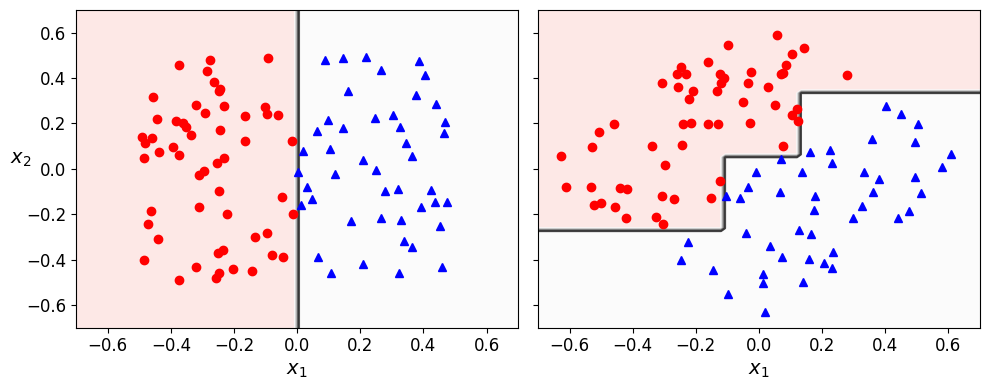

In [33]:
np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4  # 45 도
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

### 6.10 결정 트리의 분산 문제
- 결정 트리의 주요 문제는 분산이 상당히 크다는 것
  - 하이퍼파라미터, 데이터를 조금만 변경해도 매우 다른 모델이 생성될 수 있음
- 여러 결정 트리의 예측을 평균하면 분산을 크게 줄일 수 있음 (결정 트리의 앙상블) -> 랜덤 포레스트

# 6장 연습문제 7번
**Q. 다음 단계를 따라 moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝해 보세요.**
1. make_moons(n_samples=1000, noise=0.4)를 사용해 데이터셋 생성
2. train_test_split()을 사용해 데이터 나누기
3. DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증, 그리드 서치 수행
4. 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델 훈련, 테스트 성능 측정 => 85~87%의 정확도가 나올 것

In [2]:
# 1. 데이터셋 생성
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.4)

In [13]:
?make_moons

In [68]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [3]:
# 2. 데이터 스플릿
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 3. 그리드 서치
# hint: 여러가지 max_leaf_nodes 값 시도

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = [
    {'max_leaf_nodes':list(range(1,10)),
     'max_depth':list(range(1,10))}
]


grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             verbose=1)

In [21]:
?DecisionTreeClassifier

error 발생 -> max_leaf_nodes는 None, 2, 3 순서...

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = [
    {'max_leaf_nodes':list(range(2,100)),
     'max_depth':list(range(1,10))}
]


grid = GridSearchCV(moons_tree, param_grid=params, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1764 candidates, totalling 8820 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                             13, 14, 15, 16, 17, 18, 19, 20, 21,
                                             22, 23, 24, 25, 26, 27, 28, 29, 30,
                                             31, ...]}],
             verbose=1)

In [9]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, random_state=42)

In [10]:
# 4. 전체 훈련 세트에 대해 모델 훈련 후 테스트 세트에서 성능 측정

moons_tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, random_state=42)
moons_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, random_state=42)

In [11]:
from sklearn.metrics import accuracy_score

y_pred = grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.855

- max_depth=4, max_leaf_nodes=6 일 때 정확도 **0.855** 달성

In [8]:
# 더 큰 범위, 하이퍼파라미터 추가로 재시도!

params = [
    {'max_leaf_nodes':list(range(2,100)),
     'max_depth':list(range(1,50)),
     'min_samples_leaf':list(range(2,5))
     }
]


grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 14406 candidates, totalling 72030 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                             13, 14, 15, 16, 17, 18, 19, 20, 21,
                                             22, 23, 24, 25, 26, 27, 28, 29, 30,
                                             31, ...],
                          'min_samples_leaf': [2, 3, 4]}],
             verbose=1)

In [9]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=12, min_samples_leaf=2,
                       random_state=42)

In [11]:
moons_tree = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=12, min_samples_leaf=2, random_state=42)
moons_tree.fit(X_train, y_train)

y_pred = grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.875

- max_depth=6
- max_leaf_nodes=12
- min_samples_leaf=2
- **0.855 -> 0.875**로 정확도 향상!

# 6장 연습문제 8번
**Q. 다음 단계를 따라 랜덤 포레스트를 만들어 보세요.**
1. 이전 연습문제에 이어서 훈련 세트의 서브셋 1,000개 생성
  - 각각은 랜덤으로 선택된 100개의 샘플을 가지고 있음
2. 이전 연습문제에서 찾은 최적의 매개변수를 사용해 각 서브셋에 결정 트리 훈련
  - 테스트 세트로 이 1,000개의 결정 트리 평가
  - 더 작은 데이터셋에서 훈련 -> 앞서 만든 것보다 성능 떨어짐. 약 80%의 정확도
3. 각 테스트 세트 샘플에 대해 1,000개의 결정 트리 예측을 만들고 다수로 나온 예측만 취함
  - 사이파이의 node() 함수
  - 테스트 세트에 대한 **다수결 예측** 생성
4. 테스트 세트에서 이 예측 평가
  - 앞서 만든 모델보다 조금 높은 정확도

In [14]:
# 1. 훈련 세트의 서브셋 생성
# hint: 사이킷런 ShuffleSplit

from sklearn.model_selection import ShuffleSplit
from sklearn.base import clone

shuffle_split = ShuffleSplit(n_splits=1000, test_size=len(X_train) - 100, random_state=42)

mini_sets = []
for mini_train_index, mini_test_index in shuffle_split.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [17]:
# 2. 7번 문제에서 찾은 최적의 매개변수 사용해 각 서브셋에 결정 트리 훈련
# 테스트세트로 이 1000개의 결정트리를 평가

forest = [clone(grid.best_estimator_) for _ in range(1000)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_pred, y_test))

np.mean(accuracy_scores)

np.float64(0.8141099999999999)

In [18]:
# 3. 각 테스트 세트 샘플에 대해 1,000개의 결정 트리 예측 생성
# 다수로 나온 예측만 취하기 -> 사이파이의 mode() 함수
# 테스트 세트에 대한 다수결 예측 만들기

Y_pred = np.empty([1000, len(X_test)], dtype=np.int8)
Y_pred.shape


from scipy.stats import mode

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [19]:
accuracy_score(y_test, y_pred_majority_votes)

0.88

**0.875 -> 0.88로 성능 향상됨**

# 5장 연습문제 10번
- sklearn.datasets.load_wine() 와인 데이터셋에서 SVM 분류기 훈련
- 세 명의 재배자가 생성한 와인 샘플 178개의 화학 성분 포함
- 목표: 와인의 화학 성분을 기반으로 재배자를 예측할 수 있는 분류 모델 훈련하는 것
- SVM 분류기는 이진 분류기이므로 세 가지 클래스 모두 분류하려면 OvA를 사용해야 함

In [31]:
# load datasets
from sklearn import datasets

wine = datasets.load_wine()
X, y = wine.data, wine.target

In [28]:
?datasets.load_wine

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SVM 분류기 생성
svm_clf = SVC(kernel='linear', decision_function_shape='ovr')
accuracy_scores = cross_val_score(svm_clf, X_scaled, y, cv=5, scoring='accuracy')

# 정확도
mean_accuracy = np.mean(accuracy_scores)
print(mean_accuracy)

0.9550793650793651
